## Uso de Regressão Linear, Rede Neural e RN com ajuste de hiperparâmetro

  Material de apoio:
  - [Stock Prices forecasting with LSTM](https://www.kaggle.com/code/bryanb/stock-prices-forecasting-with-lstm)
  - [Machine Learning na bolsa - Codifike](https://www.youtube.com/watch?v=VhjQwahg8MY)
  - [Python para finanaçs (LSTM)](https://www.youtube.com/watch?v=CvfAx3_nGME)
  - [Sobre Rede Neural LSTM](https://www.deeplearningbook.com.br/arquitetura-de-redes-neurais-long-short-term-memory/)

O modelo abaixo utiliza a biblioteca sklearn e seleciona qual algoritmo é mais eficiente: RN, RN com ajuste de hiperparâmetro ou Regressão Linear

In [ ]:
# Importando as bibliotecas

import pandas as pd

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
# Lendo o arquivo csv de ações presente no Drive

df = pd.read_csv('/content/drive/MyDrive/USP/PUB_MachineLearning/Dados/b3_stocks_1994_2020.csv', sep=',')
df

,datetime,ticker,open,close,high,low,volume
0,1994-07-04,ACE 3,48.00,48.00,48.00,47.00,46550.00
1,1994-07-04,ALP 3,155.27,156.00,156.00,155.27,163405.80
2,1994-07-04,ALP 4,131.00,131.00,131.00,131.00,6550.00
3,1994-07-04,IBP 6,600.00,600.00,600.00,600.00,7800.00
4,1994-07-04,AQT 4,0.89,0.99,0.99,0.85,13137.00
...,...,...,...,...,...,...,...
1883198,2020-12-28,Z1TO34,36.72,36.72,36.72,36.72,1358.64
1883199,2020-12-29,Z1TO34,36.31,36.31,36.31,36.31,3631.00
1883200,2020-12-30,Z1TO34,38.09,37.50,38.09,37.50,2295.17
1883201,2020-12-23,Z1TS34,209.18,209.18,209.18,209.18,10459.00


In [ ]:
# Verificando o tipo de arquivo
df.dtypes

datetime     object
ticker       object
open        float64
close       float64
high        float64
low         float64
volume      float64
dtype: object

In [ ]:
# Itau
df_itau = df[df['ticker'] == 'ITUB4' ]

In [ ]:
df_itau.tail(10)


,datetime,ticker,open,close,high,low,volume
1876426,2020-12-15,ITUB4,30.97,31.16,31.40,30.93,7.813314e+08
1876427,2020-12-16,ITUB4,31.24,31.75,32.18,31.02,1.303408e+09
1876428,2020-12-17,ITUB4,31.89,31.71,32.15,31.57,5.682983e+08
1876429,2020-12-18,ITUB4,31.72,31.66,32.12,31.51,1.007453e+09
1881186,2020-12-21,ITUB4,31.05,31.10,31.50,30.91,8.122629e+08
1881187,2020-12-22,ITUB4,31.17,31.25,31.65,31.15,6.169132e+08
1881188,2020-12-23,ITUB4,31.32,31.94,32.05,31.27,6.356557e+08
1881189,2020-12-28,ITUB4,32.22,32.17,32.43,32.01,4.973340e+08
1881190,2020-12-29,ITUB4,32.27,32.10,32.39,31.93,5.254648e+08
1881191,2020-12-30,ITUB4,32.20,31.63,32.33,31.63,8.162117e+08


In [ ]:
# Verificando o tipo do arquivo
df_itau.dtypes

datetime     object
ticker       object
open        float64
close       float64
high        float64
low         float64
volume      float64
dtype: object

In [ ]:
# Mudando o tipo de data
df_itau['datetime'] = pd.to_datetime(df_itau['datetime'], format='%Y-%m-%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Criando novos campos de medias móveis
df_itau['mm5d'] = df_itau['close'].rolling(5).mean()
df_itau['mm21d'] = df_itau['close'].rolling(21).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Empurrando para frente os valores das ações
df_itau['close'] = df_itau['close'].shift(-1)

df_itau.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,datetime,ticker,open,close,high,low,volume,mm5d,mm21d
885780,2009-05-20,ITUB4,29.50,29.99,30.84,29.50,291812233.0,NaN,NaN
886110,2009-05-21,ITUB4,29.61,30.38,30.15,29.41,143839395.0,NaN,NaN
886441,2009-05-22,ITUB4,30.40,30.40,30.59,29.42,153292069.0,NaN,NaN
886758,2009-05-25,ITUB4,30.35,31.55,30.67,29.93,51834816.0,NaN,NaN
887092,2009-05-26,ITUB4,30.15,31.69,31.79,29.90,295076559.0,30.47,NaN


In [ ]:
# Retirando os dados nulos
df_itau.dropna(inplace=True)
df_itau

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,datetime,ticker,open,close,high,low,volume,mm5d,mm21d
892443,2009-06-18,ITUB4,30.60,30.60,30.73,30.00,112300149.0,30.874,31.310000
892767,2009-06-19,ITUB4,30.49,30.38,31.02,30.24,150149979.0,30.590,31.337143
893096,2009-06-22,ITUB4,30.30,29.75,30.50,29.94,152809942.0,30.482,31.355714
893422,2009-06-23,ITUB4,30.59,29.75,30.59,29.61,226583169.0,30.286,31.325714
893749,2009-06-24,ITUB4,29.87,30.43,30.20,29.26,207942340.0,30.124,31.294762
...,...,...,...,...,...,...,...,...,...
1881186,2020-12-21,ITUB4,31.05,31.25,31.50,30.91,812262907.0,31.476,30.315714
1881187,2020-12-22,ITUB4,31.17,31.94,31.65,31.15,616913165.0,31.494,30.427619
1881188,2020-12-23,ITUB4,31.32,32.17,32.05,31.27,635655684.0,31.532,30.533810
1881189,2020-12-28,ITUB4,32.22,32.10,32.43,32.01,497334009.0,31.624,30.667619


In [ ]:
# Verificando quantidade de linhas
qtd_linhas = len(df_itau)

qtd_linhas_treino = round(.70 * qtd_linhas)
qtd_linhas_teste = qtd_linhas - qtd_linhas_treino  
qtd_linhas_validacao = qtd_linhas_treino - qtd_linhas_teste

info = (
    f"linhas treino= 0:{qtd_linhas_treino}"
    f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste -1}"
    f" linhas validação= {qtd_linhas_validacao}"
)

info

'linhas treino= 0:1997 linhas teste= 1997:2852 linhas validação= 1141'

In [ ]:
# Reindexando o data frame
df_itau = df_itau.reset_index(drop=True)
df_itau

,datetime,ticker,open,close,high,low,volume,mm5d,mm21d
0,2009-06-18,ITUB4,30.60,30.60,30.73,30.00,112300149.0,30.874,31.310000
1,2009-06-19,ITUB4,30.49,30.38,31.02,30.24,150149979.0,30.590,31.337143
2,2009-06-22,ITUB4,30.30,29.75,30.50,29.94,152809942.0,30.482,31.355714
3,2009-06-23,ITUB4,30.59,29.75,30.59,29.61,226583169.0,30.286,31.325714
4,2009-06-24,ITUB4,29.87,30.43,30.20,29.26,207942340.0,30.124,31.294762
...,...,...,...,...,...,...,...,...,...
2848,2020-12-21,ITUB4,31.05,31.25,31.50,30.91,812262907.0,31.476,30.315714
2849,2020-12-22,ITUB4,31.17,31.94,31.65,31.15,616913165.0,31.494,30.427619
2850,2020-12-23,ITUB4,31.32,32.17,32.05,31.27,635655684.0,31.532,30.533810
2851,2020-12-28,ITUB4,32.22,32.10,32.43,32.01,497334009.0,31.624,30.667619


In [ ]:
# Separando as features e labels
features = df_itau.drop(['ticker', 'datetime', 'close'], 1)
labels = df_itau['close']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
# Escolhendo as melhores features com Kbest

features_list = ('open','high','low','volume','mm5d','mm21d')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)


Melhores features:
{'low': 97.5189559468017, 'volume': 93.408285349463, 'high': 73.9580955825343, 'mm21d': 53.12418099620789, 'mm5d': 1.487954946854661}


In [ ]:
features = df_itau.drop(['ticker', 'datetime', 'close', 'mm5d'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
features

,open,high,low,volume,mm21d
0,30.60,30.73,30.00,112300149.0,31.310000
1,30.49,31.02,30.24,150149979.0,31.337143
2,30.30,30.50,29.94,152809942.0,31.355714
3,30.59,30.59,29.61,226583169.0,31.325714
4,29.87,30.20,29.26,207942340.0,31.294762
...,...,...,...,...,...
2848,31.05,31.50,30.91,812262907.0,30.315714
2849,31.17,31.65,31.15,616913165.0,30.427619
2850,31.32,32.05,31.27,635655684.0,30.533810
2851,32.22,32.43,32.01,497334009.0,30.667619


In [ ]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

In [ ]:
# Separando os dados de treino e teste
X_train = features_scale[:qtd_linhas_treino]
X_test = features_scale[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

1997 1997
855 855


In [ ]:
# Treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
pred= lr.predict(X_test)
cd =r2_score(y_test, pred)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:98.66'

In [ ]:
# Rede neural
rn = MLPRegressor(max_iter=2000)

rn.fit(X_train, y_train)
pred= rn.predict(X_test)

cd = rn.score(X_test, y_test)


f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:98.48'

In [ ]:
# Rede neural com ajuste hyper parameters
"""
rn = MLPRegressor(max_iter=2000)

parameter_space = {
        'hidden_layer_sizes': [(i,) for i in list(range(1, 21))],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam', 'lbfgs'], 
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant', 'adaptive'],
    }

search = GridSearchCV(rn, parameter_space, n_jobs=-1, cv=5)


search.fit(X_train,y_train)
clf = search.best_estimator_
pred= search.predict(X_test)

cd = search.score(X_test, y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'

"""
# Gasta muito tempo processando

"\nrn = MLPRegressor(max_iter=2000)\n\nparameter_space = {\n        'hidden_layer_sizes': [(i,) for i in list(range(1, 21))],\n        'activation': ['tanh', 'relu'],\n        'solver': ['sgd', 'adam', 'lbfgs'], \n        'alpha': [0.0001, 0.05],\n        'learning_rate': ['constant', 'adaptive'],\n    }\n\nsearch = GridSearchCV(rn, parameter_space, n_jobs=-1, cv=5)\n\n\nsearch.fit(X_train,y_train)\nclf = search.best_estimator_\npred= search.predict(X_test)\n\ncd = search.score(X_test, y_test)\n\nf'Coeficiente de determinação:{cd * 100:.2f}'\n\n"

In [ ]:
# Executando a previsão

previsao = features_scale[qtd_linhas_teste: qtd_linhas]

data_pregao_full = df_itau['datetime']
data_pregao = data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full = df_itau['close']
res = res_full[qtd_linhas_teste:qtd_linhas]

pred = lr.predict(previsao)

df = pd.DataFrame({'datetime':data_pregao, 'real':res, 'previsao':pred})
df['real'] = df['real'].shift(+1)

df.set_index('datetime', inplace = True)

print(df)

             real   previsao
datetime                    
2012-11-30    NaN  32.076563
2012-12-03  33.00  33.063348
2012-12-04  32.64  32.569670
2012-12-05  32.81  32.867451
2012-12-06  32.70  32.389370
...           ...        ...
2020-12-21  31.10  31.295478
2020-12-22  31.25  31.550814
2020-12-23  31.94  31.889820
2020-12-28  32.17  32.228679
2020-12-29  32.10  32.101594

[1997 rows x 2 columns]


In [ ]:
print(features_scale[1])

[0.28759398 0.29943503 0.31401411 0.03593236 0.30819362]


In [ ]:
previsao = ([[0.2910401,  0.29033271, 0.3066544,  0.02455398, 0.30728091]])
pred = lr.predict(previsao)

print(pred)

[30.31961459]


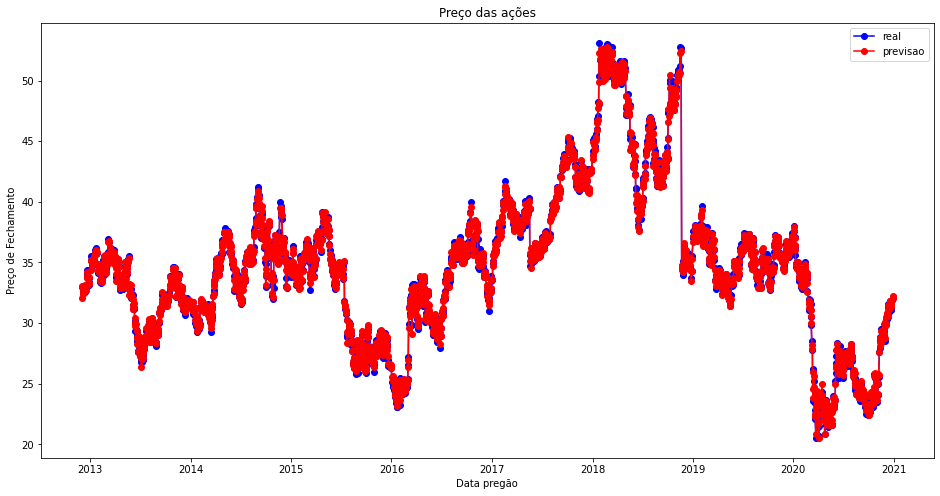

In [ ]:
# Gráfico

plt.figure(figsize = (16,8))
plt.title('Preço das ações')
plt.plot(df['real'],label = 'real', color = 'blue', marker = 'o')
plt.plot(df['previsao'],label = 'previsao', color = 'red', marker = 'o')
plt.xlabel('Data pregão')
plt.ylabel('Preço de Fechamento')
leg = plt.legend()

## Engenharia de Dados

Material de apoio:
 - [Engenharia de Dados](https://www.youtube.com/watch?v=gew9014pGaM&ab_channel=Codifike)

O código abaixo busca organizar e agrupar dados de ativos financeiros provenientes diretamente do [site da B3](https://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/mercado-a-vista/series-historicas/).
Ele foi utilizado para organizar o arquivo "all_bovespa.csv" que será usado para treinar uma Rede Neural Recorrente (Biblioteca Keras) no próximo tópico.

In [ ]:
#Importando Pandas
import pandas as pd

In [ ]:
def read_file(path, name_file, year_date, type_file):

  _file = f'{path}{name_file}{year_date}.{type_file}'
  colspecs = [(2,10),
              (10,12),
              (12,24),
              (27,39),
              (56,69),
              (69,82),
              (82,95),
              (108,121),
              (152,170),
              (170,188)
  ]

  names = ['data_pregao','codbdi','sigla_acao','nome_acao','preco_abertura',
          'preco_maximo','preco_minimo','preco_fechamento','qtd_negocios','volume_negocios']
      
  df = pd.read_fwf(_file, colspecs = colspecs, names = names, skiprows = 1)
  return df

In [ ]:
# Filtrar ações
def filter_stocks(df): 
  df = df [df['codbdi']==2]
  df = df.drop(['codbdi'],1)
  return df

In [ ]:
# Ajuste de data
def parse_date(df):
  df['data_pregao'] = pd.to_datetime(df['data_pregao'], format = '%Y%m%d')
  return df

In [ ]:
# Ajuste dos campos numéricos
def parse_values(df):
  df['preco_abertura'] = (df['preco_abertura']/100).astype(float)
  df['preco_maximo'] = (df['preco_maximo']/100).astype(float)
  df['preco_minimo'] = (df['preco_minimo']/100).astype(float)
  df['preco_fechamento'] = (df['preco_fechamento']/100).astype(float)
  return df


In [ ]:
# Juntando os arquivos
def concat_file(path, name_file, year_date, type_file, final_file):
  
  for i, y in enumerate(year_date):
    df = read_file(path, name_file, y, type_file)
    df = filter_stocks(df)
    df = parse_date(df)
    df = parse_values(df)

    if i == 0:
      df_final = df
    else:
      df_final = pd.concat([df_final, df])
      
  df_final.to_csv(f'{path}//{final_file}', index = False)


Foram baixadas as séries históricas de 2020, 2021 e 2022. O programa coleta os 3 arquivos distintos, agrupa e formata

In [ ]:
# Executando programa (ta vinculado com meu drive)

year_date = ['2020','2021','2022']

path = f'/content/drive/MyDrive/USP/PUB_MachineLearning/Dados/COTAHIST_B3/'

name_file = 'COTAHIST_A'

type_file = 'TXT'

final_file = 'all_bovespa.csv'

concat_file(path, name_file, year_date, type_file, final_file)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


## Rede Neural LSTM

O código abaixo utilizará uma Rede Neural Recorrente denominada Long Short Term Memory (LSTM)

In [1]:
#importando as bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import  train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow import keras
from keras import regularizers


In [2]:
# Carrega o arquivo formatado criado no tópico anterior
df = pd.read_csv('/content/drive/MyDrive/USP/PUB_MachineLearning/Dados/COTAHIST_B3/all_bovespa.csv', sep = ',')
df= df.sort_values(by = ['data_pregao'])

In [3]:
# Formatando Datas
df['data_pragao'] = pd.to_datetime(df['data_pregao'], format = '%Y-%m-%d')

Dentre todas, escolhe-se a ação da Petrobras para trabalhar

In [4]:
# Filtro de Ação 
df_acao = df[df['sigla_acao'] == 'PETR4'] # Petrobras
df_acao

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios,data_pragao
262,2020-01-02,PETR4,PETROBRAS,30.51,30.70,30.31,30.70,37774500.0,1.154777e+11,2020-01-02
997,2020-01-03,PETR4,PETROBRAS,30.88,31.24,30.45,30.45,71595600.0,2.204408e+11,2020-01-03
998,2020-01-06,PETR4,PETROBRAS,30.43,30.94,29.95,30.81,81844000.0,2.513704e+11,2020-01-06
2550,2020-01-07,PETR4,PETROBRAS,30.82,30.88,30.47,30.69,32822000.0,1.006116e+11,2020-01-07
2551,2020-01-08,PETR4,PETROBRAS,30.69,30.77,30.24,30.50,48215600.0,1.469849e+11,2020-01-08
...,...,...,...,...,...,...,...,...,...,...
466218,2022-09-14,PETR4,PETROBRAS,30.75,31.43,30.63,31.12,49039700.0,1.525662e+11,2022-09-14
467031,2022-09-15,PETR4,PETROBRAS,30.92,31.23,30.80,31.06,45553200.0,1.412122e+11,2022-09-15
467863,2022-09-16,PETR4,PETROBRAS,30.86,30.95,30.34,30.78,107303600.0,3.290925e+11,2022-09-16
468691,2022-09-19,PETR4,PETROBRAS,30.50,31.38,29.88,31.27,65559900.0,2.027448e+11,2022-09-19


In [5]:
 # Seleção de campos
df_acao_fec = df_acao[['data_pregao', 'preco_fechamento']]
df_acao_fec

,data_pregao,preco_fechamento
262,2020-01-02,30.70
997,2020-01-03,30.45
998,2020-01-06,30.81
2550,2020-01-07,30.69
2551,2020-01-08,30.50
...,...,...
466218,2022-09-14,31.12
467031,2022-09-15,31.06
467863,2022-09-16,30.78
468691,2022-09-19,31.27


In [6]:
# Ajuste de Index
df_acao_fec = df_acao_fec.set_index(pd.DatetimeIndex(df_acao_fec['data_pregao'].values))
df_acao_fec

,data_pregao,preco_fechamento
2020-01-02,2020-01-02,30.70
2020-01-03,2020-01-03,30.45
2020-01-06,2020-01-06,30.81
2020-01-07,2020-01-07,30.69
2020-01-08,2020-01-08,30.50
...,...,...
2022-09-14,2022-09-14,31.12
2022-09-15,2022-09-15,31.06
2022-09-16,2022-09-16,30.78
2022-09-19,2022-09-19,31.27


In [7]:
# Retirar coluna
df_acao_fec.drop('data_pregao', axis = 1, inplace = True)
df_acao_fec

,preco_fechamento
2020-01-02,30.70
2020-01-03,30.45
2020-01-06,30.81
2020-01-07,30.69
2020-01-08,30.50
...,...
2022-09-14,31.12
2022-09-15,31.06
2022-09-16,30.78
2022-09-19,31.27


[]

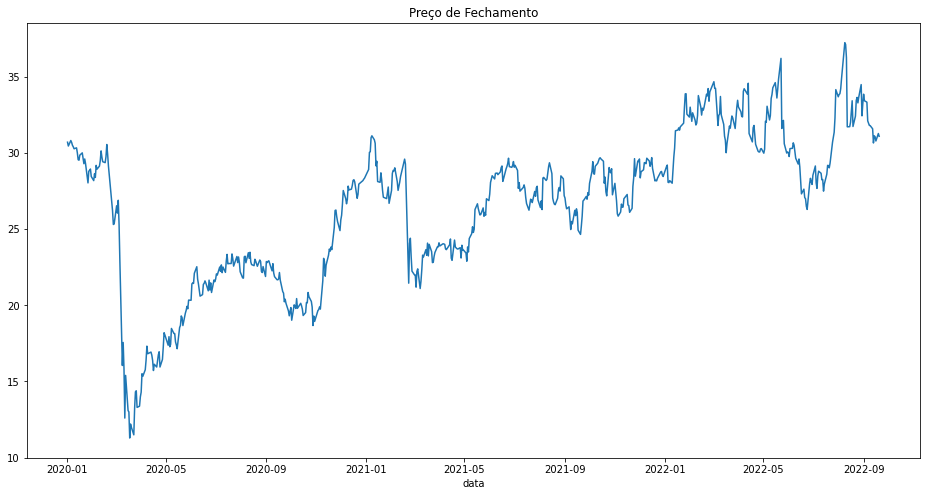

In [8]:
# Plotar informação
plt.figure(figsize = (16,8))
plt.title('Preço de Fechamento')
plt.plot(df_acao_fec['preco_fechamento'])
plt.xlabel('data')
plt.plot()

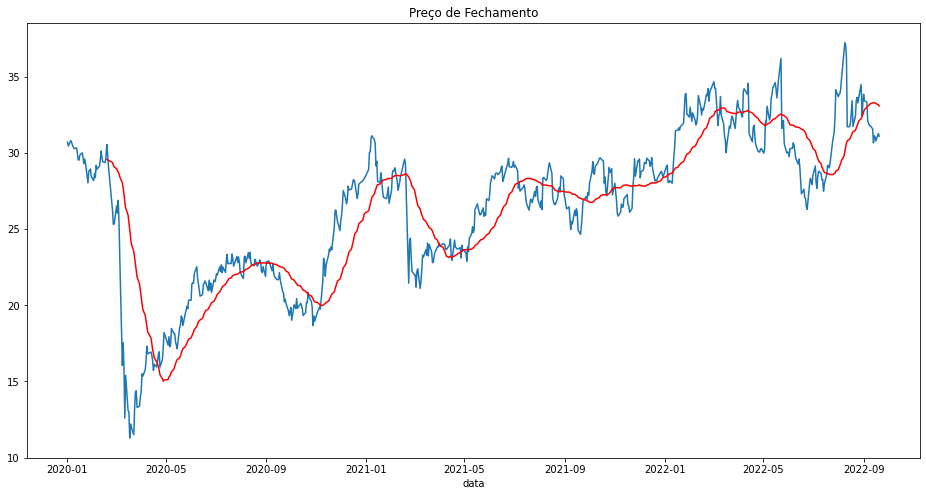

In [9]:
ma100 = df_acao_fec.rolling(35).mean()
# Plotar informação
plt.figure(figsize = (16,8))
plt.title('Preço de Fechamento')
plt.plot(df_acao_fec['preco_fechamento'])
plt.xlabel('data')
plt.plot(ma100, 'r')

In [10]:
# Qtd de Linhas
qtd_linhas = len(df_acao_fec)

qtd_linhas_treino = round(.70* qtd_linhas)

qtd_linhas_teste = qtd_linhas - qtd_linhas_treino

info = (
    f"linhas treino = 0:{qtd_linhas_treino}"
    f"linhas teste = {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste}"
    
)
info

'linhas treino = 0:474linhas teste = 474:677'

In [11]:
# Normalização
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_acao_fec)


In [34]:
df_scaled.shape

(677, 1)

In [33]:
# Separação Treino e Teste
train = df_scaled[:qtd_linhas_treino]
test = df_scaled[qtd_linhas_treino: qtd_linhas_treino + qtd_linhas_teste]
 
print(len(train), len(test), train.shape, test.shape)

474 203 (474, 1) (203, 1)


In [13]:
# Formatação para LSTM
def create_df(df, steps=1):
  dataX, dataY = [], []
  for i in range(len(df)-steps-1):
    a = df[i:(i+steps), 0]
    dataX.append(a)
    dataY.append(df[i + steps, 0])
  return np.array(dataX), np.array(dataY)

In [14]:
# Gerando dados de Treino e teste
steps = 15
X_train, Y_train = create_df(train, steps)
X_test, Y_test = create_df(test, steps)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(458, 15)
(458,)
(187, 15)
(187,)


In [15]:
# Formatando dados que o modelo espera
X_train= X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [16]:
# Montando a rede
model = Sequential()
model.add(LSTM(35, return_sequences = True, input_shape = (steps, 1)))
model.add(LSTM(18, return_sequences = True))
model.add(LSTM(9, return_sequences = True))
model.add(LSTM(5))
model.add(Dense(1))


In [17]:
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 35)            5180      
                                                                 
 lstm_1 (LSTM)               (None, 15, 18)            3888      
                                                                 
 lstm_2 (LSTM)               (None, 15, 9)             1008      
                                                                 
 lstm_3 (LSTM)               (None, 5)                 300       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 10,382
Trainable params: 10,382
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Treinamento de modelo
validation = model.fit(X_train, Y_train, validation_data = (X_test, Y_test),
                       epochs = 100, batch_size = 15, verbose = 2)

Epoch 1/100
31/31 - 19s - loss: 0.5978 - val_loss: 0.8327 - 19s/epoch - 610ms/step
Epoch 2/100
31/31 - 1s - loss: 0.3500 - val_loss: 0.7662 - 840ms/epoch - 27ms/step
Epoch 3/100
31/31 - 1s - loss: 0.2687 - val_loss: 0.8353 - 848ms/epoch - 27ms/step
Epoch 4/100
31/31 - 1s - loss: 0.2041 - val_loss: 0.8155 - 837ms/epoch - 27ms/step
Epoch 5/100
31/31 - 1s - loss: 0.1597 - val_loss: 0.7180 - 858ms/epoch - 28ms/step
Epoch 6/100
31/31 - 1s - loss: 0.1280 - val_loss: 0.6185 - 864ms/epoch - 28ms/step
Epoch 7/100
31/31 - 1s - loss: 0.1045 - val_loss: 0.5980 - 836ms/epoch - 27ms/step
Epoch 8/100
31/31 - 1s - loss: 0.0914 - val_loss: 0.5822 - 835ms/epoch - 27ms/step
Epoch 9/100
31/31 - 1s - loss: 0.0800 - val_loss: 0.4982 - 823ms/epoch - 27ms/step
Epoch 10/100
31/31 - 1s - loss: 0.0757 - val_loss: 0.4839 - 844ms/epoch - 27ms/step
Epoch 11/100
31/31 - 1s - loss: 0.0759 - val_loss: 0.4813 - 825ms/epoch - 27ms/step
Epoch 12/100
31/31 - 1s - loss: 0.0675 - val_loss: 0.5136 - 828ms/epoch - 27ms/step
E

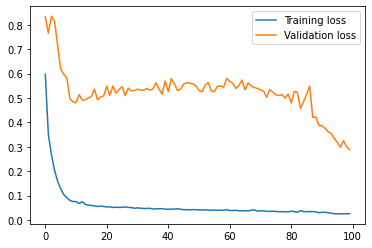

In [19]:
# Visualizando o loss
plt.plot(validation.history['loss'], label = "Training loss")
plt.plot(validation.history['val_loss'], label = "Validation loss")
plt.legend()


In [20]:
# Previsão
prev = model.predict(X_test)
prev = scaler.inverse_transform(prev) # "Desnormaliza" os dados
prev

6/6 [==============================] - 4s 23ms/step


array([[28.361055],
       [28.437845],
       [28.425985],
       [28.638342],
       [28.982918],
       [28.995567],
       [28.822836],
       [28.770924],
       [29.183626],
       [29.182295],
       [28.38344 ],
       [28.408352],
       [28.515947],
       [28.349754],
       [28.956352],
       [29.341702],
       [29.563793],
       [29.806057],
       [29.878473],
       [29.879875],
       [29.809456],
       [29.780386],
       [29.746845],
       [29.736841],
       [29.863222],
       [29.986536],
       [30.038158],
       [29.956207],
       [29.902708],
       [29.928713],
       [29.910288],
       [29.871471],
       [29.867517],
       [29.846184],
       [29.814745],
       [29.794224],
       [29.794022],
       [29.819519],
       [29.836   ],
       [29.85844 ],
       [29.890362],
       [29.90659 ],
       [29.90948 ],
       [29.927834],
       [29.948296],
       [29.962376],
       [29.954903],
       [29.951979],
       [29.94409 ],
       [29.924908],


In [21]:
# Previsão para os próximos 10 dias
lenght_test = len(test)
lenght_test

203

In [22]:
# Ultimos dias do tamanho do step
days_input_steps = lenght_test - steps
days_input_steps

188

In [23]:
# Transforma em array
input_steps = test[days_input_steps:]
input_steps = np.array(input_steps).reshape(1,-1)
input_steps


array([[1.21196329, 1.37421387, 1.49995807, 1.41274838, 1.39449519,
        1.14503493, 1.08419096, 1.08216283, 1.03957205, 0.85095575,
        0.94627797, 0.93410917, 0.87732147, 0.97669995, 0.94019357]])

In [24]:
# Transformar em lista
list_output_steps = list(input_steps)
list_output_steps = list_output_steps[0].tolist()
list_output_steps

[1.2119632906082447,
 1.3742138691872463,
 1.4999580675859738,
 1.4127483815997601,
 1.3944951915096218,
 1.1450349269444065,
 1.0841909599772805,
 1.0821628277450428,
 1.0395720508680546,
 0.8509557532699645,
 0.9462779681851288,
 0.9341091747917032,
 0.8773214722890529,
 0.9766999516686914,
 0.940193571488416]

In [25]:
# Loop para preer os próximos 10 dias

pred_output = []
i = 0
n_future = 10
while (i < n_future):

  if(len(list_output_steps) > steps):
    
    input_steps = np.array(list_output_steps[1:])
    print('{} dia. valores de entrada -> {}'.format(i, input_steps))
    input_steps = input_steps.reshape(1, -1)
    input_steps = input_steps.reshape((1, steps, 1))
    # print(imput_steps)
    pred = model.predict(input_steps, verbose = 0)
    print('{} dia. valores previsto -> {}'.format(i, pred))
    list_output_steps.extend(pred[0].tolist())
    list_output_steps = list_output_steps[1:]
    # print (list_output_steps)
    pred_output.extend(pred.tolist())
    i = i + 1
  else:
    input_steps = input_steps.reshape((1, steps, 1))
    pred = model.predict(input_steps, verbose = 0)
    print(pred[0])
    list_output_steps.extend(pred[0].tolist())
    print(len(list_output_steps))
    pred_output.extend(pred.tolist())
    i = i + 1

print(pred_output)

[0.64212674]
16
1 dia. valores de entrada -> [1.37421387 1.49995807 1.41274838 1.39449519 1.14503493 1.08419096
 1.08216283 1.03957205 0.85095575 0.94627797 0.93410917 0.87732147
 0.97669995 0.94019357 0.64212674]
1 dia. valores previsto -> [[0.6198116]]
2 dia. valores de entrada -> [1.49995807 1.41274838 1.39449519 1.14503493 1.08419096 1.08216283
 1.03957205 0.85095575 0.94627797 0.93410917 0.87732147 0.97669995
 0.94019357 0.64212674 0.61981159]
2 dia. valores previsto -> [[0.5796802]]
3 dia. valores de entrada -> [1.41274838 1.39449519 1.14503493 1.08419096 1.08216283 1.03957205
 0.85095575 0.94627797 0.93410917 0.87732147 0.97669995 0.94019357
 0.64212674 0.61981159 0.5796802 ]
3 dia. valores previsto -> [[0.52348334]]
4 dia. valores de entrada -> [1.39449519 1.14503493 1.08419096 1.08216283 1.03957205 0.85095575
 0.94627797 0.93410917 0.87732147 0.97669995 0.94019357 0.64212674
 0.61981159 0.5796802  0.52348334]
4 dia. valores previsto -> [[0.4688596]]
5 dia. valores de entrada -

In [26]:
# Transforma a saída
prev = scaler.inverse_transform(pred_output)
prev = np.array(prev).reshape(1, -1)
list_output_prev = list(prev)
list_output_prev = prev[0].tolist()
list_output_prev


[29.62033827022975,
 29.51031021493742,
 29.31243657801739,
 29.035349771119954,
 28.76601958563285,
 28.556740103339614,
 28.44045308672511,
 28.401607381243522,
 28.446388181992106,
 28.57764004391462]

In [27]:
# Formatando a saida
dates = pd.to_datetime(df_acao['data_pregao'])
predict_dates = pd.date_range(list(dates)[-1] + pd.DateOffset(1), periods = 10, freq = 'b').tolist()
predict_dates

[Timestamp('2022-09-21 00:00:00', freq='B'),
 Timestamp('2022-09-22 00:00:00', freq='B'),
 Timestamp('2022-09-23 00:00:00', freq='B'),
 Timestamp('2022-09-26 00:00:00', freq='B'),
 Timestamp('2022-09-27 00:00:00', freq='B'),
 Timestamp('2022-09-28 00:00:00', freq='B'),
 Timestamp('2022-09-29 00:00:00', freq='B'),
 Timestamp('2022-09-30 00:00:00', freq='B'),
 Timestamp('2022-10-03 00:00:00', freq='B'),
 Timestamp('2022-10-04 00:00:00', freq='B')]

In [28]:
# Dataframe de previsão

forecast_dates = []
for i in predict_dates:
  forecast_dates.append(i.date())

df_forecast = pd.DataFrame({'data_pregao': np.array(forecast_dates), 'preco_fechamento': list_output_prev})
df_forecast['data_pragao'] = pd.to_datetime(df_forecast['data_pregao'])

df_forecast = df_forecast.set_index(pd.DatetimeIndex(df_forecast['data_pregao'].values))
df_forecast.drop('data_pregao', axis = 1, inplace= True)

df_forecast

,preco_fechamento,data_pragao
2022-09-21,29.620338,2022-09-21
2022-09-22,29.510310,2022-09-22
2022-09-23,29.312437,2022-09-23
2022-09-26,29.035350,2022-09-26
2022-09-27,28.766020,2022-09-27
2022-09-28,28.556740,2022-09-28
2022-09-29,28.440453,2022-09-29
2022-09-30,28.401607,2022-09-30
2022-10-03,28.446388,2022-10-03
2022-10-04,28.577640,2022-10-04


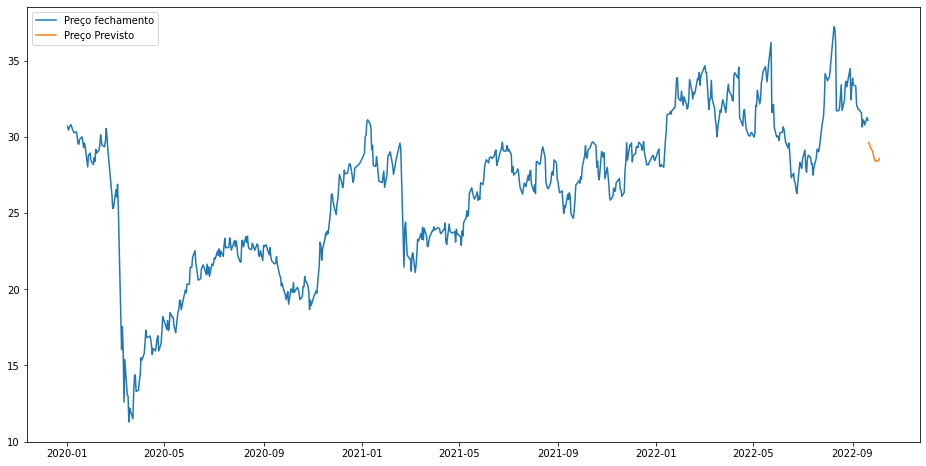

In [29]:
# Plotar gráfico
ma100 = df_acao_fec.rolling(10).mean()
plt.figure( figsize = (16,8))
plt.plot(df_acao_fec['preco_fechamento'])
plt.plot(df_forecast['preco_fechamento'])
plt.legend(['Preço fechamento', 'Preço Previsto'])
#plt.plot(ma100, 'r')
plt.show()

### Conclusão
A criação da Rede Neural não apresentou grandes dificuldades, contudo a seleção do número de neurônios e camadas para a RN não apresentam um motivo claro, o que pode atrapalhar, pois tem um grande impacto no funcionamento
do modelo e principalmente na extrapolação.

Foi utilizado apenas um parâmetro ("preco_fechamento") para o modelo, isso pode afetar a exatidão do modelo, pois ignora outros parâmetros relevantes.

A previsão para dias futuros não ocorreu com muita eficiência. Comparando com as ações do perido previsto é possível perceber que a têndencia prevista é semelhante à real, porém distoa muito do valor.



In [30]:
df_t = get_ac('AAPL','2013-09-15','2021-11-15')
parse_date(df_t)

train_data, test_data, val_data = ttv(df_t['Close'])

train_data_norm, test_data_norm, val_data_norm, scaler = fscaler(train_data, test_data, val_data)

X_train, Y_train, X_test, Y_test, X_val, Y_val = Processing(train_data_norm, test_data_norm, val_data_norm, 15)

model = lstm(days_time_step)

val = validation(model, X_train, Y_train, X_val, Y_val)

plot_val(val)

predict, real = pred(model, X_test, test_data, scaler)

plot_pred(predict, real, df_t)


NameError: ignored